# Описание проекта

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.
Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка. 

# Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/Users/666/Documents/Data Analysis/Проекты/df/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

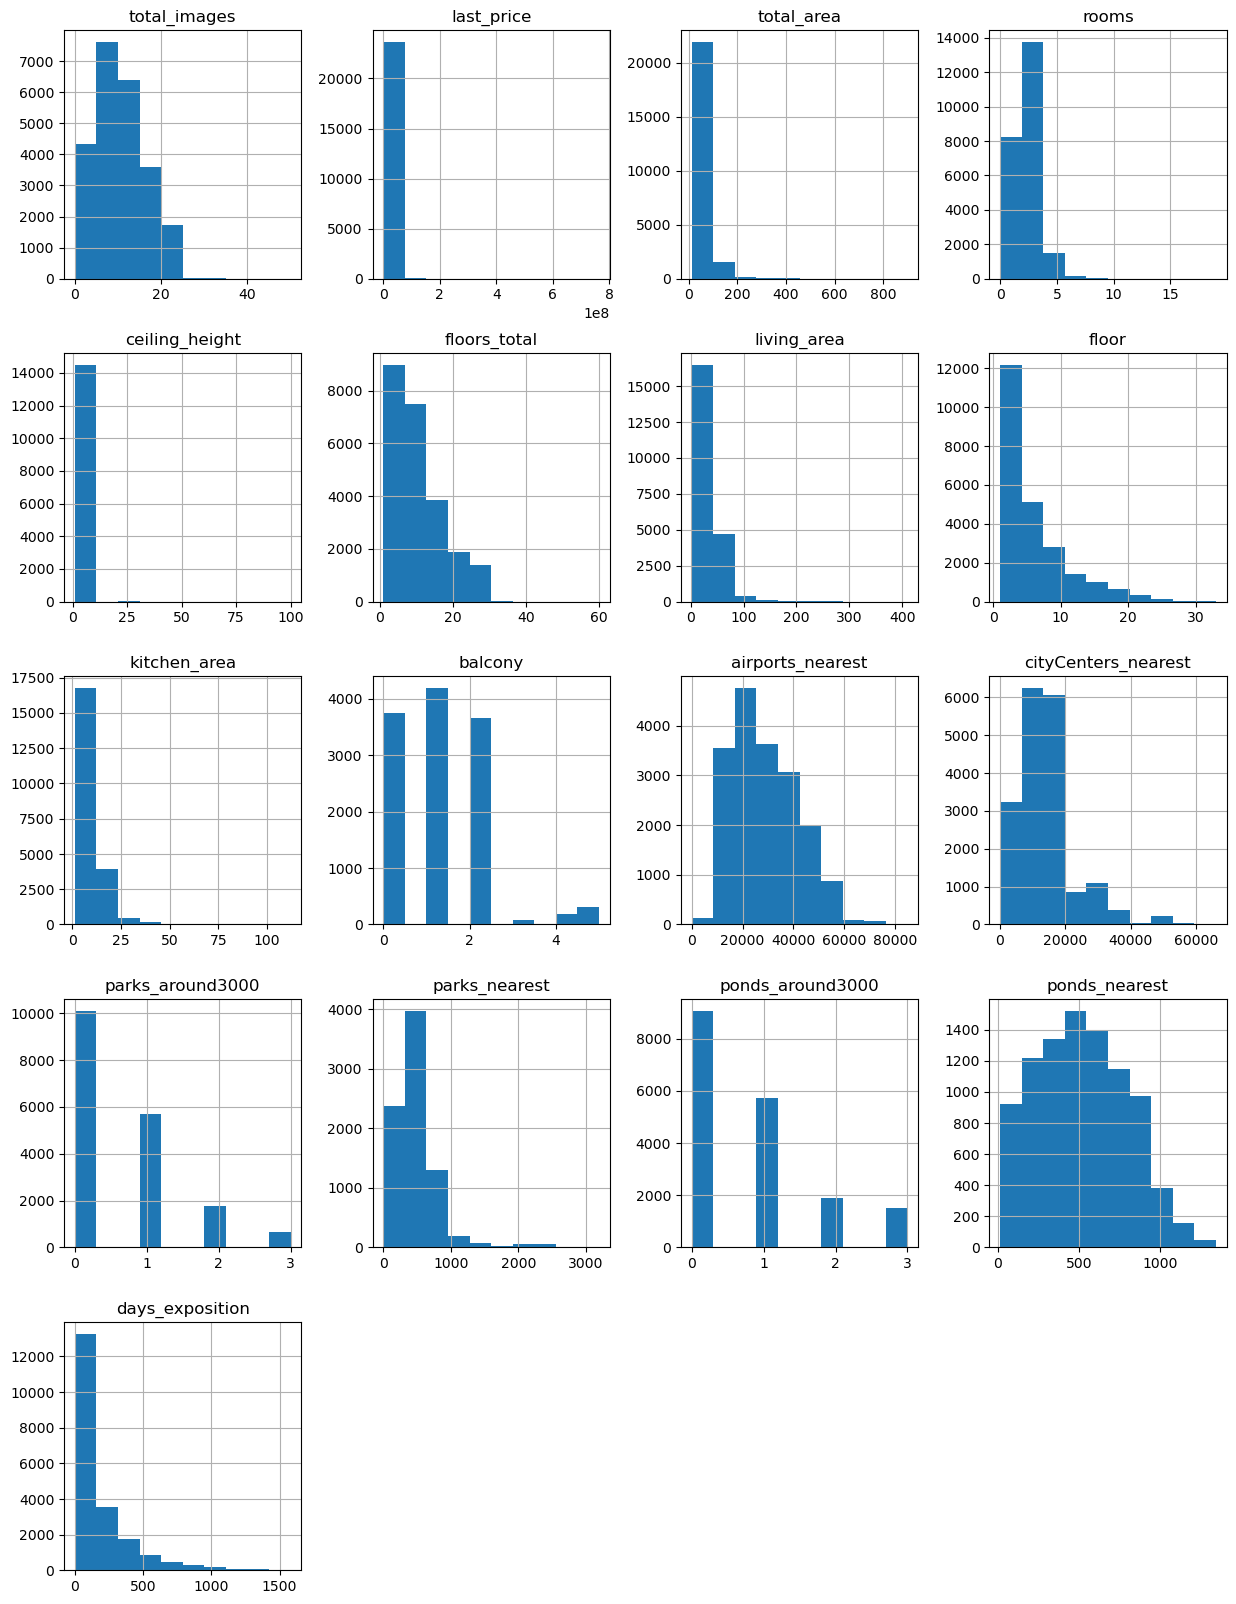

In [5]:
data.hist(figsize=(15, 20));

# Предобработка данных

### Переименовываем названия столбцов

In [6]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

In [7]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

### Ищем пропуски и их выражение в процентах, значения меньше 5% можно отбросить

In [8]:
print(data.isna().sum().sort_values())

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64


In [9]:
print((data.isna().mean() * 100).sort_values())

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
city_centers_nearest    23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64


In [10]:
data = data.dropna(subset=['locality_name', 'floors_total'])
#data = data.dropna(subset=['city_centers_nearest', 'airports_nearest', 'ponds_nearest', 'parks_nearest'])

### Если количество балконов не указано, считаем что их нет

In [11]:
data['balcony'] = data['balcony'].fillna(0)

### Если не указано что квартира является апартаментами, считаем что это не апартаменты

In [12]:
data['is_apartment'] = data['is_apartment'].fillna('False')

### По характеру остальных данных, невозможно наверняка предположить значения, поэтому можно либо заполнить медианой, либо оставить пропуски

In [13]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())#
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())#
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())#
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())#

In [14]:
print((data.isna().mean() * 100).sort_values())

total_images            0.0
ponds_around3000        0.0
parks_nearest           0.0
parks_around3000        0.0
city_centers_nearest    0.0
airports_nearest        0.0
locality_name           0.0
balcony                 0.0
kitchen_area            0.0
open_plan               0.0
studio                  0.0
is_apartment            0.0
floor                   0.0
living_area             0.0
floors_total            0.0
ceiling_height          0.0
rooms                   0.0
first_day_exposition    0.0
total_area              0.0
last_price              0.0
ponds_nearest           0.0
days_exposition         0.0
dtype: float64


### Меняем тип данных

In [15]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['last_price'] = data['last_price'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)
data['is_apartment'] = data['is_apartment'].astype(bool)
data['balcony'] = data['balcony'].astype(int)
data['airports_nearest'] = data['airports_nearest'].astype(int)#
data['city_centers_nearest'] = data['city_centers_nearest'].astype(int)#
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['parks_nearest'] = data['parks_nearest'].astype(int)#
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_nearest'] = data['ponds_nearest'].astype(int)#
data['days_exposition'] = data['days_exposition'].astype(int)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [17]:
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8          True  ...   
1            2.65            11         18.6      1          True  ...   
2            2.65             5         34.3      4          True  ...   
3            2.65            14         30.0      9          True  ...   
4            3.03            14         32.0     13          True  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0        0  Санкт-Петербург             18863   
1 

### Устраним неявные дубликаты

In [18]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [19]:
data['locality_name'] = data['locality_name'].str.replace('ё','е')
words = [
    'посёлок', 'городской посёлок', 'поселок городского типа', 'деревня', 'садовое товарищество', 'село', \
    'поселок станции', 'коттеджный поселок', 'поселок городского типа имени', 'посёлок при железнодорожной станции',\
    'садоводческое некоммерческое товарищество', 'пок', 'городской', 'коттеджный', 'станции', 'имени', \
    'при железнодорожной'
]
for word in words:
    data['locality_name'] = data['locality_name'].str.replace(word, '')

In [20]:
data['locality_name'].sort_values().unique()

array(['   Вещево', '   Приветнинское', '  Большая Ижора', '  Будогощь',
       '  Вещево', '  Виллози', '  Громово', '  Кивеннапа Север',
       '  Корнево', '  Лесное', '  Лесогорский', '  Лужайка', '  Мга',
       '  Морозова', '  Назия', '  Новоселье', '  Павлово',
       '  Приветнинское', '  Рощино', '  Свердлова', '  Свирь',
       '  Свирьстрой', '  Советский', '  Счастье', '  Федоровское',
       '  Янино-1', ' Агалатово', ' Александровская', ' Алексеевка',
       ' Аннино', ' Аро', ' Барышево', ' Батово', ' Бегуницы',
       ' Белогорка', ' Белоостров', ' Большая Вруда', ' Большая Ижора',
       ' Большая Пустомержа', ' Большие Колпаны', ' Большое Рейзино',
       ' Большой Сабск', ' Бор', ' Борисова Грива', ' Бугры', ' Ваганово',
       ' Важины', ' Вартемяги', ' Вахнова Кара', ' Вознесенье',
       ' Возрождение', ' Войсковицы', ' Войскорово', ' Володарское',
       ' Вырица', ' Выскатка', ' Высокоключевой', ' Гаврилово',
       ' Гарболово', ' Гладкое', ' Глажево', ' Глебы

### Найдем аномальные значения

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.0,9.00,14.00,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.0,3400000.0,4646000.00,6790000.00,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.0,52.00,69.70,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.0,2.00,3.00,19.0
ceiling_height,23565.0,2.724530e+00,9.910260e-01,1.0,2.6,2.65,2.70,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.0,9.00,16.00,60.0
living_area,23565.0,3.410225e+01,2.118913e+01,2.0,19.0,30.00,41.10,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.0,4.00,8.00,33.0
kitchen_area,23565.0,1.042323e+01,5.631746e+00,1.3,7.3,9.10,11.41,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.0,0.00,1.00,5.0


### Приводим высоту потолков к нормальным значениям, если высота больше 13 метров то делим на 10, если меньше 1.3, то умножаем на медиану

In [22]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [23]:
def height(h):
    if h >=13:
        h = h/10
    elif h <= 1.3:
        h = h * data['ceiling_height'].median()
    return h
data['ceiling_height'] = data['ceiling_height'].apply(height)

In [24]:
data['ceiling_height'].unique()

array([ 2.7 ,  2.65,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  3.2 ,  2.61,  3.25,  3.45,  2.77,
        2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,  2.47,
        2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,  2.51,
        2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,  2.59,
        2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,  3.55,
        3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,  5.  ,
        2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,  4.7 ,
        2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,  2.3 ,
        3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,  3.95,
        3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,  3.24,
        4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,  3.09,
        8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,  2.68,
        3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,  3.32,
        3.18,  8.3 ,

### Изменим цену квартиры в соответствии с площадью

In [25]:
data.query('last_price == 12190') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20,2,2.75,25,32.0,25,True,...,40.5,0,Санкт-Петербург,36421,9176,1,805,0,503,8


In [26]:
data.loc[8793, 'last_price'] = 12190000

### Изменим размер жилой площади в соответствии с ценой

In [27]:
data.query('living_area == 2') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13915,20,6350000,52.0,2018-02-06,2,3.00,6,2.0,2,True,...,9.0,0,Санкт-Петербург,32453,6521,0,455,1,1012,91
21758,0,2330000,23.0,2018-01-01,0,2.65,24,2.0,22,True,...,9.1,0,Мурино,26757,13096,0,455,1,503,66


In [28]:
data.loc[13915, 'living_area'] = 20
data.loc[21758, 'living_area'] = 20

In [29]:
data.query('living_area == 3') 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3242,7,4440000,41.0,2017-07-02,1,2.65,17,3.0,17,True,...,11.0,0,Санкт-Петербург,19272,13073,0,455,0,503,216
23574,14,64990000,139.0,2015-11-24,3,3.00,8,3.0,8,True,...,16.0,1,Санкт-Петербург,33255,5975,1,630,3,100,280


In [30]:
data.loc[3242, 'living_area'] = 30
data.loc[23574, 'living_area'] = 30

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.0,9.00,14.00,50.0
last_price,23565.0,6.540575e+06,1.091091e+07,430000.0,3400000.0,4647000.00,6790000.00,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.0,52.00,69.70,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.0,2.00,3.00,19.0
ceiling_height,23565.0,2.698366e+00,2.424286e-01,1.4,2.6,2.65,2.70,10.3
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.0,9.00,16.00,60.0
living_area,23565.0,3.410607e+01,2.118556e+01,5.0,19.0,30.00,41.10,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.0,4.00,8.00,33.0
kitchen_area,23565.0,1.042323e+01,5.631746e+00,1.3,7.3,9.10,11.41,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.0,0.00,1.00,5.0


# Добавление в таблицу новых столбцов 

цена одного квадратного метра;

день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

месяц публикации объявления;

год публикации объявления;

тип этажа квартиры (значения — «‎первый», «последний», «другой»);

расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [32]:
data['meter_price'] = (data['last_price'] / data['total_area']).astype('int')#
data['weekday_pub'] = data['first_day_exposition'].dt.weekday
data['month_pub'] = data['first_day_exposition'].dt.month
data['year_pub'] = data['first_day_exposition'].dt.year
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).astype(int)#

In [33]:
def floor_cat(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['floor_cat'] = data.apply(floor_cat, axis=1)

In [34]:
print(data.head())
data.describe().T

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20    13000000       108.0           2019-03-07      3   
1             7     3350000        40.4           2018-12-04      1   
2            10     5196000        56.0           2015-08-20      2   
3             0    64900000       159.0           2015-07-24      3   
4             2    10000000       100.0           2018-06-19      2   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8          True  ...   
1            2.65            11         18.6      1          True  ...   
2            2.65             5         34.3      4          True  ...   
3            2.65            14         30.0      9          True  ...   
4            3.03            14         32.0     13          True  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0            482                 2            755         

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.0,9.00,14.00,50.0
last_price,23565.0,6.540575e+06,1.091091e+07,430000.0,3400000.0,4647000.00,6790000.00,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.0,40.0,52.00,69.70,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.0,1.0,2.00,3.00,19.0
ceiling_height,23565.0,2.698366e+00,2.424286e-01,1.4,2.6,2.65,2.70,10.3
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.0,9.00,16.00,60.0
living_area,23565.0,3.410607e+01,2.118556e+01,5.0,19.0,30.00,41.10,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.0,4.00,8.00,33.0
kitchen_area,23565.0,1.042323e+01,5.631746e+00,1.3,7.3,9.10,11.41,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.0,0.00,1.00,5.0


# Исследовательский анализ

### Мной были изучены следующие параметры обьектов:

общая площадь;

жилая площадь;

площадь кухни;

цена объекта;

количество комнат;

высота потолков;

этаж квартиры;

тип этажа квартиры («первый», «последний», «другой»);

общее количество этажей в доме;

расстояние до центра города в метрах;

расстояние до ближайшего аэропорта;

расстояние до ближайшего парка;

день и месяц публикации объявления.

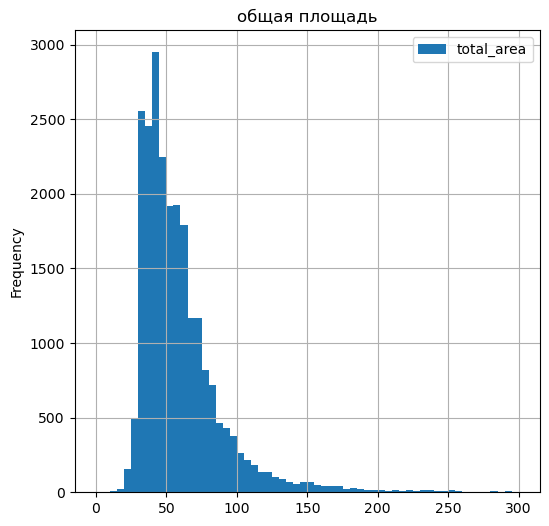

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [35]:
data.plot(title='общая площадь',
          y='total_area',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 300),
          grid=True   
)
plt.show()
data['total_area'].describe()

#### Наиболее часто встречающимися обьявлениями, будут квартиры площадью 30-60 м2 

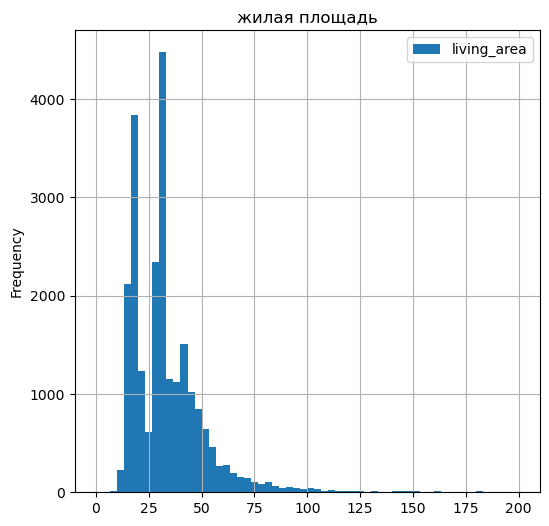

count    23565.000000
mean        34.106074
std         21.185563
min          5.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

In [36]:
data.plot(title='жилая площадь',
          y='living_area',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 200),
          grid=True   
)
plt.show()
data['living_area'].describe()

#### Видим пики с площадью 13-20 м2, 26-30 м2 и в районе 45 м2, что говорит о наличии разных категорий жилых помещений

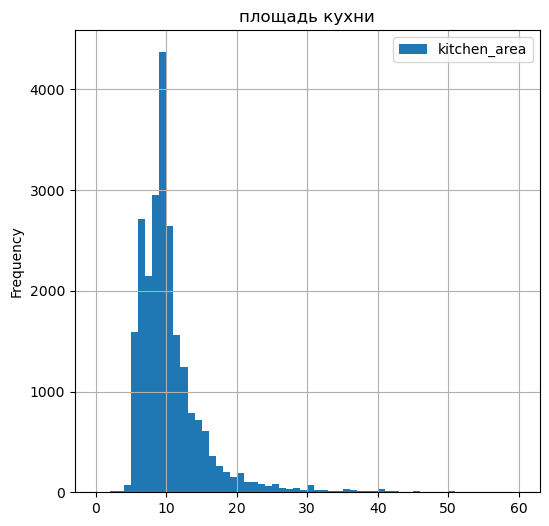

count    23565.000000
mean        10.423234
std          5.631746
min          1.300000
25%          7.300000
50%          9.100000
75%         11.410000
max        112.000000
Name: kitchen_area, dtype: float64

In [37]:
data.plot(title='площадь кухни',
          y='kitchen_area',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 60),
          grid=True   
)
plt.show()
data['kitchen_area'].describe()

#### Чаще всего встречаются кухни размером от 9 до 13 м2

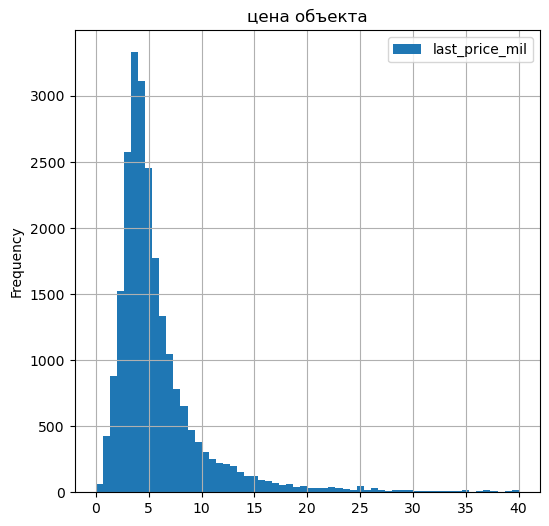

count    23565.000000
mean         6.540575
std         10.910914
min          0.430000
25%          3.400000
50%          4.647000
75%          6.790000
max        763.000000
Name: last_price_mil, dtype: float64

In [38]:
data['last_price_mil'] = data['last_price'] / 1000000
data.plot(title='цена объекта',
          y='last_price_mil',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 40),
          grid=True   
)
plt.show()
data['last_price_mil'].describe()

#### Наибольшее количество обьявлений в диапозоне 3-6 миллионов руб.

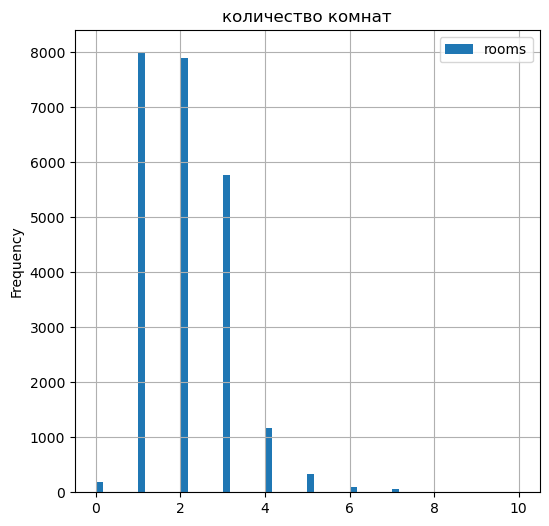

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [39]:
data.plot(title='количество комнат',
          y='rooms',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 10),
          grid=True   
)
plt.show()
data['rooms'].describe()

#### Конфигурации с 1, 2 и 3 комнатами самые распостраненные

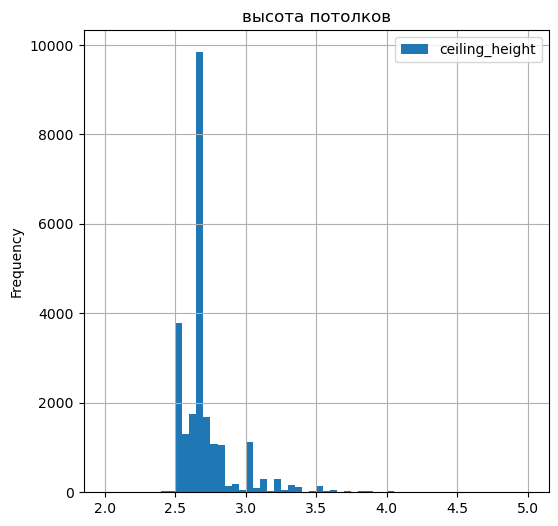

count    23565.000000
mean         2.698366
std          0.242429
min          1.400000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

In [40]:
data.plot(title='высота потолков',
          y='ceiling_height',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(2, 5),
          grid=True   
)
plt.show()
data['ceiling_height'].describe()

#### Самая распостраненная высота потолка находится в диапозоне от 2,5 до 2,7 м

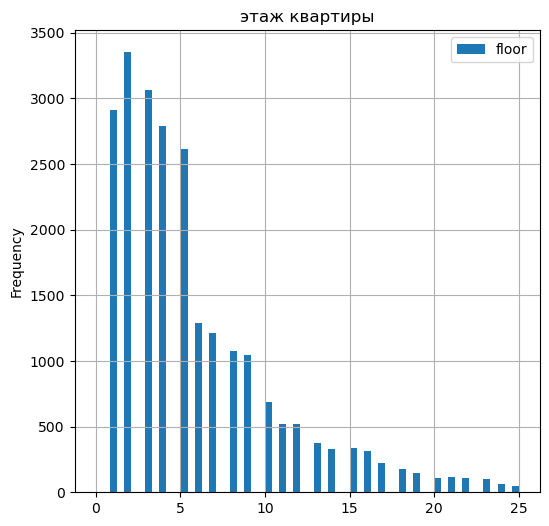

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [41]:
data.plot(title='этаж квартиры',
          y='floor',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 25),
          grid=True   
)
plt.show()
data['floor'].describe()

#### Видим резкое снижение количества обьявлений выше 5 этажей, я это связываю с типом застройки. Пятиэтажных зданий больше

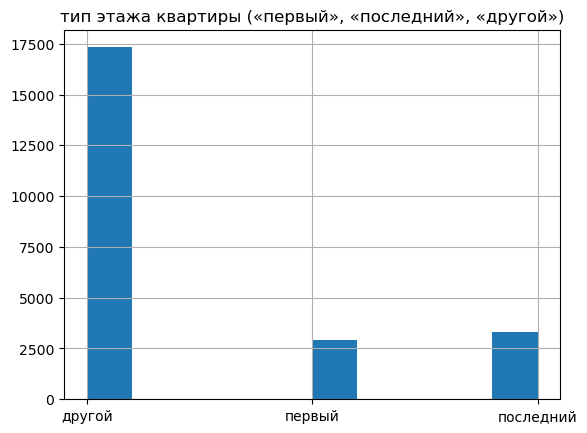

In [42]:
data.groupby('floor_cat')['floor_cat'].count().sort_values()
data['floor_cat'].hist()
plt.title('тип этажа квартиры («первый», «последний», «другой»)')
plt.show()

#### Большинство квартир находится в промежутке между первым и последним

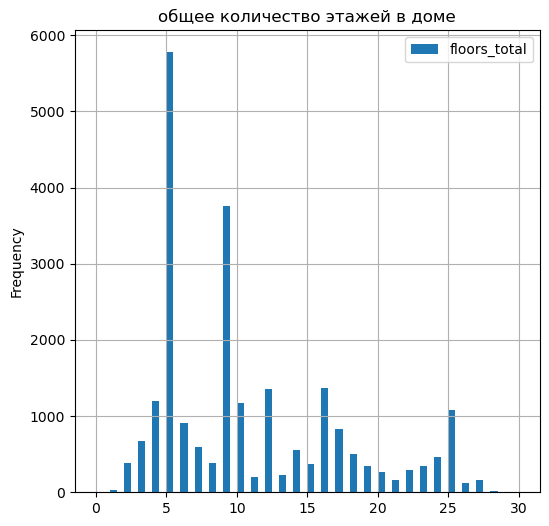

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [43]:
data.plot(title='общее количество этажей в доме',
          y='floors_total',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 30),
          grid=True   
)
plt.show()
data['floors_total'].describe()

#### Как и предпологалось выше наибольшее количество 5-ти этажных домов, так же распостранены 9-ти этажные

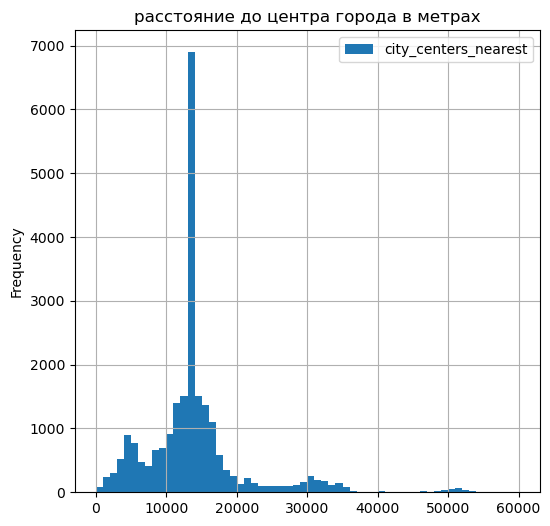

count    23565.000000
mean     13936.653299
std       7555.490313
min        181.000000
25%      10935.000000
50%      13096.000000
75%      15237.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [44]:
data.plot(title='расстояние до центра города в метрах',
          y='city_centers_nearest',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 60000),
          grid=True   
)
plt.show()
data['city_centers_nearest'].describe()

#### Наиболее распостраненное расстояние до центра это 10-15 км, выбросом является медиана

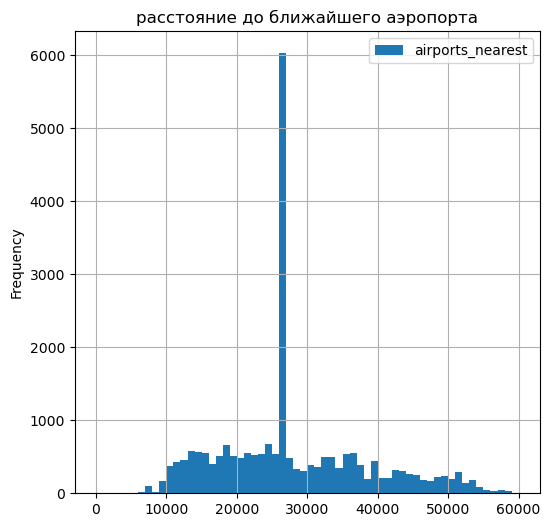

count    23565.000000
mean     28318.855803
std      11086.811381
min          0.000000
25%      21166.000000
50%      26757.000000
75%      34324.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [45]:
data.plot(title='расстояние до ближайшего аэропорта',
          y='airports_nearest',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 60000),
          grid=True   
)
plt.show()
data['airports_nearest'].describe()

#### Большинство квартир находится на отдалении 10 км от аэропорта, выбросом является медиана

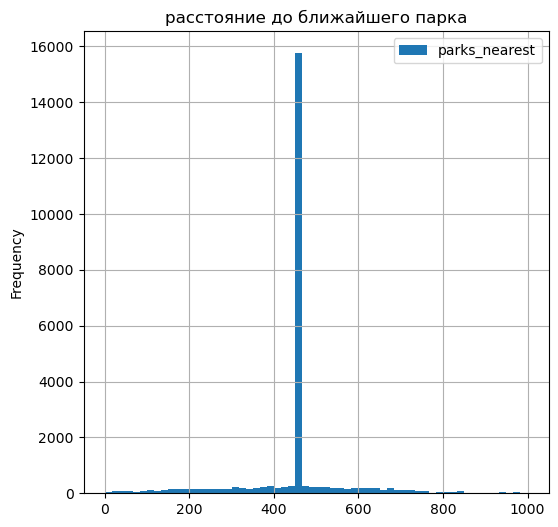

count    23565.000000
mean       467.124379
std        200.095655
min          1.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [46]:
data.plot(title='расстояние до ближайшего парка',
          y='parks_nearest',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 1000),
          grid=True   
)
plt.show()
data['parks_nearest'].describe()

#### Большинство квартир находится на расстоянии от 180 до 480 м от парков, выбросом является медиана

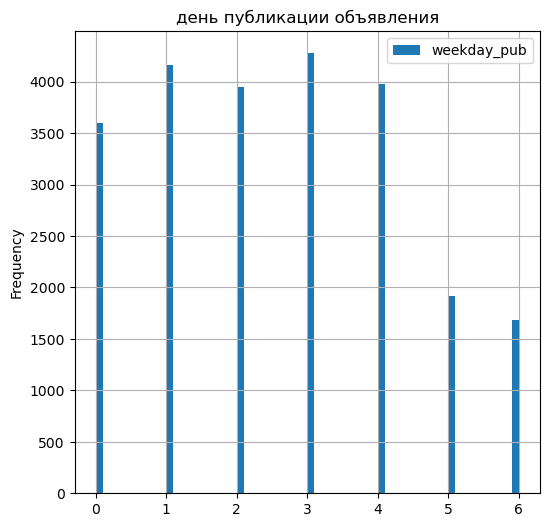

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_pub, dtype: float64

In [47]:
data.plot(title='день публикации объявления',
          y='weekday_pub',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 6),
          grid=True   
)
plt.show()
data['weekday_pub'].describe()

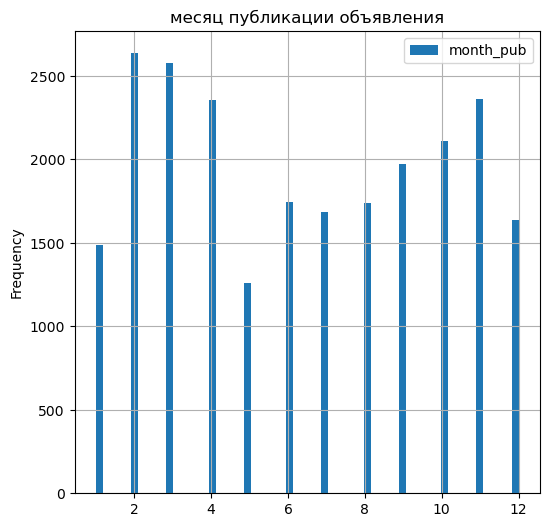

count    23565.000000
mean         6.401570
std          3.492948
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_pub, dtype: float64

In [48]:
data.plot(title='месяц публикации объявления',
          y='month_pub',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(1, 12),
          grid=True   
)
plt.show()
data['month_pub'].describe()

####  Больше всего обьявлений публикуют в будние дни и в промежутках с 3 по 4 и 10-11 месяцы

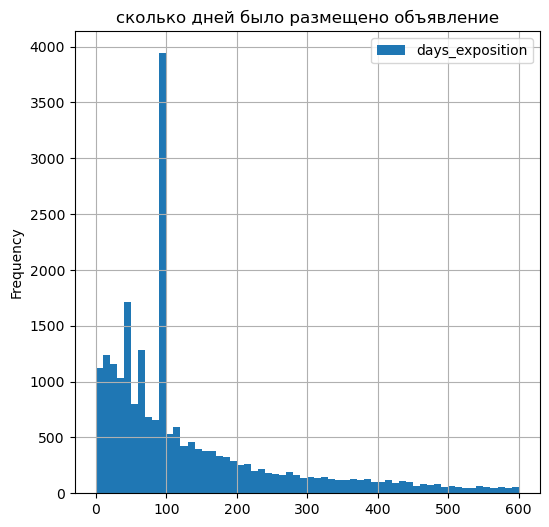

count    23565.000000
mean       169.203692
std        206.497729
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [49]:
data.plot(title='сколько дней было размещено объявление',
          y='days_exposition',
          kind='hist',
          bins=60,
          figsize=(6, 6),
          range=(0, 600),
          grid=True   
)
plt.show()
data['days_exposition'].describe()

#### В среднем квартиру продавали за 170 дней, медиана 95, видно по выбросу

In [50]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.00,6.0,9.000,14.00,50.0
last_price,23565.0,6.540575e+06,1.091091e+07,430000.00,3400000.0,4647000.000,6790000.00,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.00,40.0,52.000,69.70,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.00,1.0,2.000,3.00,19.0
ceiling_height,23565.0,2.698366e+00,2.424286e-01,1.40,2.6,2.650,2.70,10.3
floors_total,23565.0,1.067588e+01,6.594823e+00,1.00,5.0,9.000,16.00,60.0
living_area,23565.0,3.410607e+01,2.118556e+01,5.00,19.0,30.000,41.10,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.00,2.0,4.000,8.00,33.0
kitchen_area,23565.0,1.042323e+01,5.631746e+00,1.30,7.3,9.100,11.41,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.00,0.0,0.000,1.00,5.0


### Рассматриваю факторы влияющие на стоимость обьекта

общая площадь;

жилая площадь;

площадь кухни;

количество комнат;

этаж, на котором расположена квартира (первый, последний, другой);

дата размещения (день недели, месяц, год).

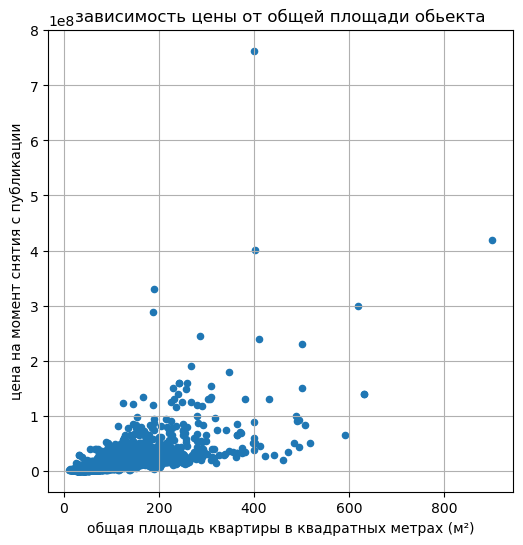

Коэффициент корреляции: 0.653687300657986


In [51]:
data.plot(title='зависимость цены от общей площади обьекта',
          x='total_area', y='last_price',
          xlabel='общая площадь квартиры в квадратных метрах (м²)', ylabel='цена на момент снятия с публикации',
          figsize=(6, 6),kind='scatter',grid=True 
)
plt.show()
print('Коэффициент корреляции:', data['total_area'].corr(data['last_price']))

#### Чем больше общая площадь, тем выше цена

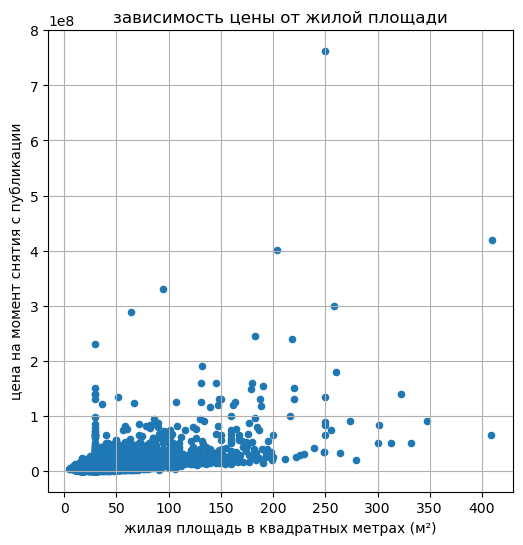

Коэффициент корреляции: 0.540959974368185


In [52]:
data.plot(title='зависимость цены от жилой площади',
          x='living_area', y='last_price',
          xlabel='жилая площадь в квадратных метрах (м²)', ylabel='цена на момент снятия с публикации',
          figsize=(6, 6),kind='scatter',grid=True 
)
plt.show()
print('Коэффициент корреляции:', data['living_area'].corr(data['last_price']))

#### Зависимость не такая явная, как с общей площадью но она есть. Чем больще жилая площадь, тем выше цена

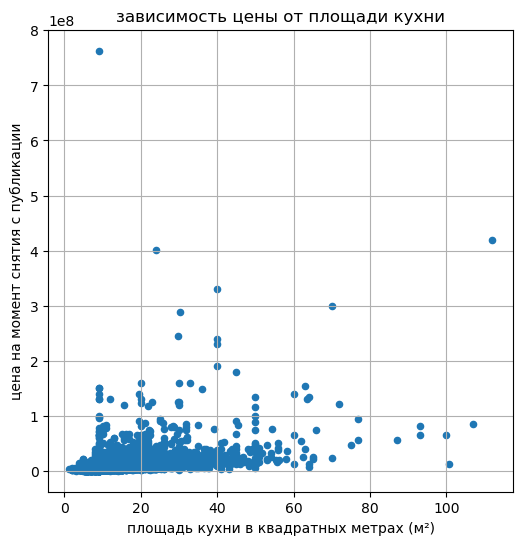

Коэффициент корреляции: 0.44094887787741416


In [53]:
data.plot(title='зависимость цены от площади кухни',
          x='kitchen_area', y='last_price',
          xlabel='площадь кухни в квадратных метрах (м²)', ylabel='цена на момент снятия с публикации',
          figsize=(6, 6),kind='scatter',grid=True 
)
plt.show()
print('Коэффициент корреляции:', data['kitchen_area'].corr(data['last_price']))

#### Здесь зависимость еще менее выражена, но она присутствует

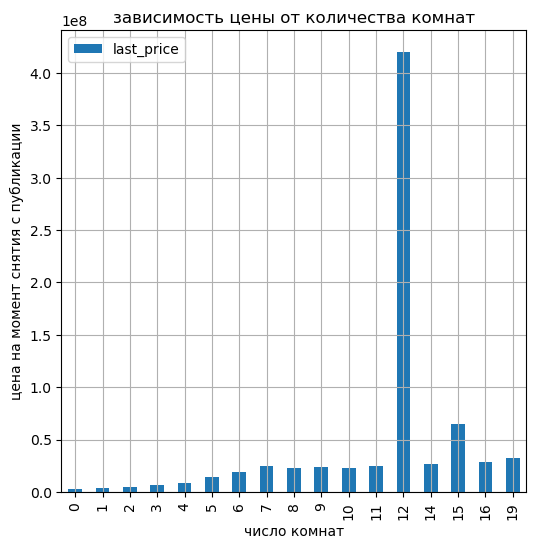

Коэффициент корреляции: 0.3631881382327343


In [60]:
data.pivot_table(
    index='rooms', values='last_price', aggfunc='median'
).plot(
    title='зависимость цены от количества комнат',
    xlabel='число комнат',ylabel='цена на момент снятия с публикации',
    figsize=(6, 6),kind='bar',grid=True                                                                      
)
plt.show()
print('Коэффициент корреляции:', data['rooms'].corr(data['last_price']))

#### Чем больше комнат, тем предположительно больше площадь квартиры, соответственно цена выше. Корреляция выражена менее явно

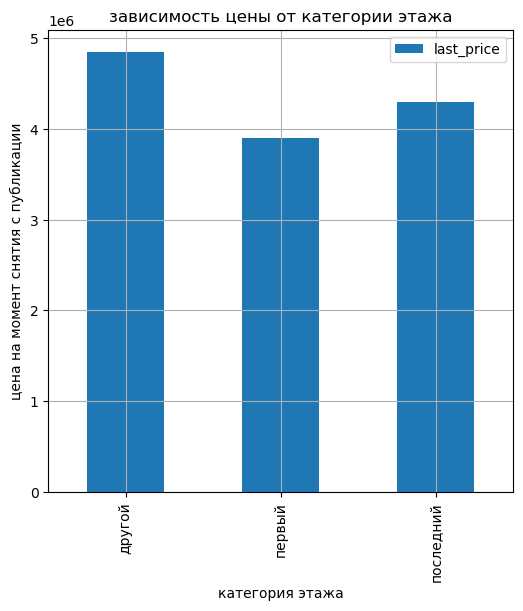

In [62]:
data.pivot_table(
    index='floor_cat', values='last_price', aggfunc='median'
).plot(
    title='зависимость цены от категории этажа',
    xlabel='категория этажа',ylabel='цена на момент снятия с публикации',
    figsize=(6, 6),kind='bar',grid=True                                                                      
)
plt.show()

#### Первый этаж как правило дешевле остальных, что видно на графике

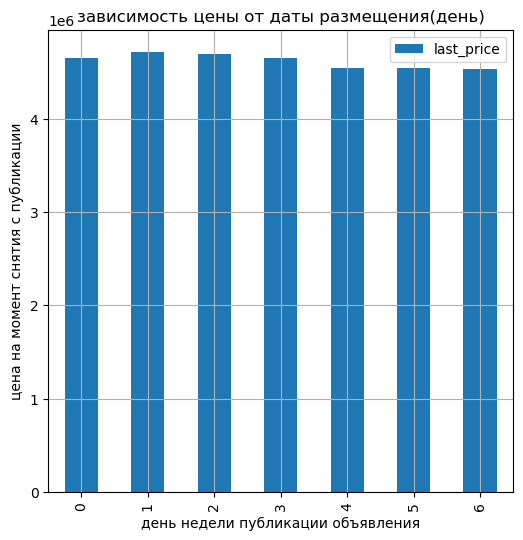

In [64]:
data.pivot_table(
    index='weekday_pub', values='last_price', aggfunc='median'
).plot(
    title='зависимость цены от даты размещения(день)',
    xlabel='день недели публикации объявления',ylabel='цена на момент снятия с публикации',
    figsize=(6, 6),kind='bar',grid=True                                                                      
)
plt.show()

#### Заметно снижение зависимости по мере приближения к выходным, это может быть связано с общим количеством публикаций

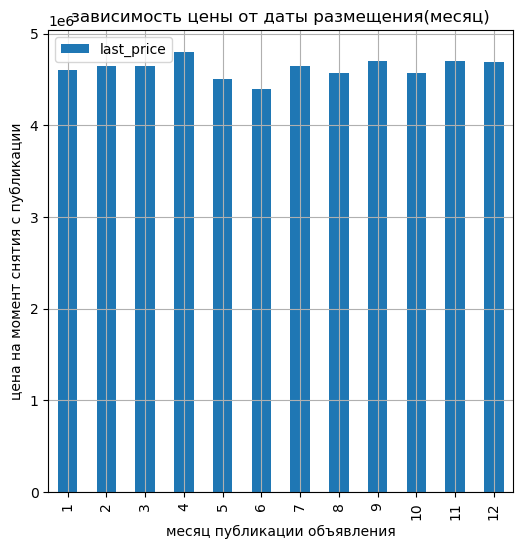

In [65]:
data.pivot_table(
    index='month_pub', values='last_price', aggfunc='median'
).plot(
    title='зависимость цены от даты размещения(месяц)',
    xlabel='месяц публикации объявления',ylabel='цена на момент снятия с публикации',
    figsize=(6, 6),kind='bar',grid=True                                                                      
)
plt.show()

#### Симметричная ситуация по месяцам, самыми нагруженными были зимние

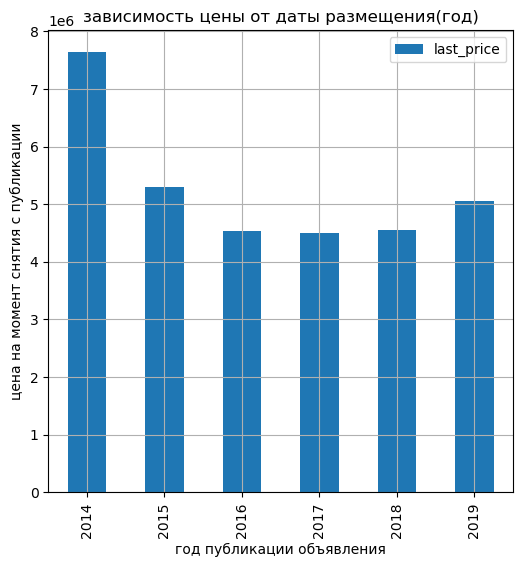

In [67]:
data.pivot_table(
    index='year_pub', values='last_price', aggfunc='median'
).plot(
    title='зависимость цены от даты размещения(год)',
    xlabel='год публикации объявления',ylabel='цена на момент снятия с публикации',
    figsize=(6, 6),kind='bar',grid=True                                                                      
)
plt.show()

#### Цена жилья по сравнению с 2014 годом уменьшилась, можно связать с экономической ситуацией в целом по стране

### Средняя цена одного м², топ 10

In [77]:
mean_m = data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'mean'])
mean_m.columns = ['общее кол-во', 'цена одного м²']
mean_m.sort_values(by='цена одного м²', ascending=False).head(10)

,общее кол-во,цена одного м²
locality_name,,
Зеленогорск,24,115122.500000
Санкт-Петербург,15651,114875.572296
Репино,4,104238.500000
Пушкин,369,103125.373984
Сестрорецк,183,101757.163934
Лисий Нос,3,100660.333333
Кудрово,171,100134.105263
Мистолово,11,98549.545455
Левашово,1,96997.000000


#### Самый дорогой метр: Зеленогорск, Санкт-Петербург
#### Самый дешевый метр: Мурино, Левашово

### Среняя цена километра

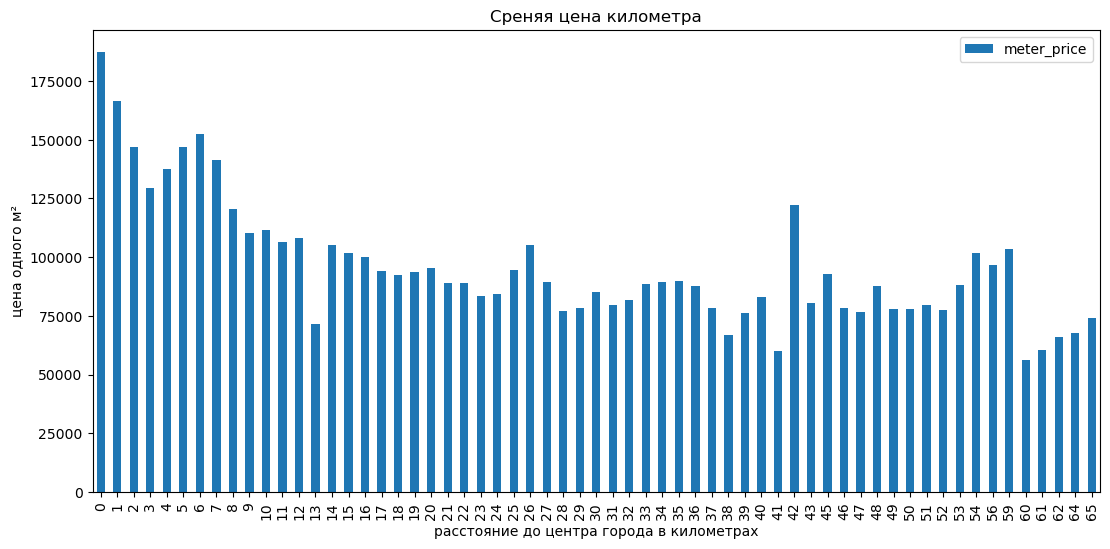

In [84]:
mean_km = data.pivot_table(index='city_centers_nearest_km', values='meter_price', aggfunc='mean').plot(
    title='Среняя цена километра',
    xlabel='расстояние до центра города в километрах',ylabel='цена одного м²',
    figsize=(13, 6),kind='bar'  
)
plt.show()

#### Отслеживается корреляция цены с расстоянием от центра города, чем ближе, тем дороже. Предполагаю, что выбивающиеся значения это премиальный сегмент

# Вывод

### В ходе выполнения проекта, мной были выполнены следующие преобразования и аналитические выводы:

Были найдены и обработаны пропуски в данных, в том числе неявные

Изменены типы данных

Обработаны аномалии

Добавлены новые столбцы, для более точного анализа

Проведен исследовательский анализ, в ходе которого были определены факторы, наиболее влияющие на цену жилых обьектов

Была найдена средняя цена квадратного метра и исследована корреляция цены по отношению к отдаленности от центра города города